In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import DistanceMetric
from math import radians
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\ashwi\\Desktop\\shops_location.csv')
df.head()

,lat,long
0,13.009260,74.796181
1,13.002235,74.799615
2,12.989523,74.795495
3,12.978818,74.810601
4,12.963093,74.805451


In [3]:
scaler = MinMaxScaler()
scaler.fit(df[['lat']])
df['lat']=scaler.transform(df[['lat']])
scaler.fit(df[['long']])
df['long']=scaler.transform(df[['long']])
df

,lat,long
0,1.000000,0.030662
1,0.956986,0.054247
2,0.879147,0.025945
3,0.813596,0.129718
4,0.717312,0.094341
...,...,...
115,0.932291,0.257075
116,0.893372,0.066038
117,0.678273,0.698112
118,0.958920,0.070755


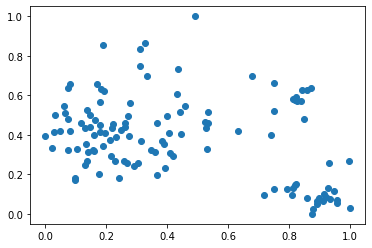

In [4]:
plt.scatter(df['lat'],df['long'])

In [5]:
gm = GaussianMixture(n_components=5)
gm = gm.fit(df[['lat','long']])

In [6]:
cluster = gm.predict(df[['lat','long']])
cluster

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 2, 1, 1, 1, 3, 0, 3, 3, 3, 3, 3, 3, 2, 2, 4, 1, 3, 3,
       0, 0, 3, 3, 3, 3, 4, 0, 2, 4, 4, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 4,
       2, 2, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 4, 2, 4,
       2, 2, 4, 0, 2, 2, 2, 1, 2, 2], dtype=int64)

In [7]:
#Silhouette Score to all add it


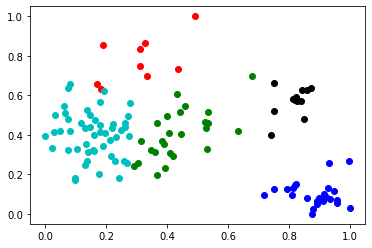

In [8]:
df['cluster']=cluster
df_dict =dict()
for i in np.unique(cluster):
    df_done=df[df.cluster==i]
    c = 10*['r','g','b','c','k','y','m']
    plt.scatter(df_done['lat'],df_done['long'],color=c[i])
    df_dict[i]=df_done

In [9]:
print('silhouette score:', silhouette_score(df[['lat','long']],cluster))


silhouette score: 0.48876177250293795


In [11]:
print(df_dict[0]['lat'][:])

9      0.489894
47     0.188553
53     0.309461
66     0.309461
67     0.182405
73     0.334051
83     0.168059
104    0.327903
113    0.434457
Name: lat, dtype: float64


In [12]:
rnd = np.random
Q = 40
n=0
for i in range(5):
    n= len(df_dict[i])
    N = [i for i in range(1, n+1)]
    V = [0] + N
    q = {k: rnd.randint(1, 10) for k in N}
    df_dict[i]['order']=list(q.values())
    df_dict[i]['ind']=list(q.keys())
    titles = list(df_dict[i].columns)
    titles[1],titles[2]=titles[2],titles[1]
    titles[0],titles[1]=titles[1],titles[0]
    titles[0],titles[-1]=titles[-1],titles[0]
    df_dict[i]=df_dict[i][titles]

<ipython-input-12-480822d59e73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[i]['order']=list(q.values())
<ipython-input-12-480822d59e73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[i]['ind']=list(q.keys())


In [13]:
int(df_dict[i][df_dict[i].lat==0.7499757368511695]['order'])

5

<ipython-input-14-e6ca753c9721>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[i][df_dict[i].lat==m][df_dict[i].long==n]['order']), (m+0.01,n))
<ipython-input-14-e6ca753c9721>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[i][df_dict[i].lat==m][df_dict[i].long==n]['order']), (m+0.01,n))
<ipython-input-14-e6ca753c9721>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[i][df_dict[i].lat==m][df_dict[i].long==n]['order']), (m+0.01,n))
<ipython-input-14-e6ca753c9721>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[i][df_dict[i].lat==m][df_dict[i].long==n]['order']), (m+0.01,n))
<ipython-input-14-e6ca753c9721>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[i][df_dict[i].lat==m][df_dict[i].long==n]['or

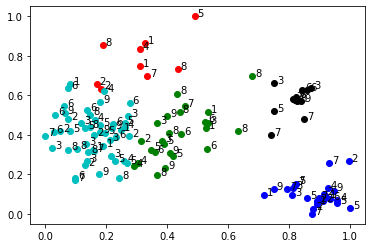

In [14]:
c = 10*['r','g','b','c','k','y','m']
for i in range(5):
    plt.scatter(df_dict[i]['lat'], df_dict[i]['long'], c=c[i])
    for (m,n) in zip(list(df_dict[i]['lat']), list(df_dict[i]['long'])):
        plt.annotate( int(df_dict[i][df_dict[i].lat==m][df_dict[i].long==n]['order']), (m+0.01,n))

<ipython-input-15-389891a6bb53>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-15-389891a6bb53>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-15-389891a6bb53>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-15-389891a6bb53>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-15-389891a6bb53>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]

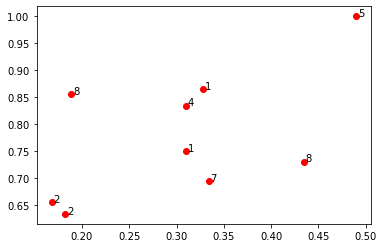

In [15]:
plt.scatter(df_dict[0]['lat'], df_dict[0]['long'], c='r')
for (m,n) in zip(list(df_dict[0]['lat']), list(df_dict[0]['long'])):
    plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))

<ipython-input-67-a9cbd4b94bfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[1][df_dict[1].lat==m][df_dict[1].long==n]['order']), (m+0.002,n))
<ipython-input-67-a9cbd4b94bfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[1][df_dict[1].lat==m][df_dict[1].long==n]['order']), (m+0.002,n))
<ipython-input-67-a9cbd4b94bfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[1][df_dict[1].lat==m][df_dict[1].long==n]['order']), (m+0.002,n))
<ipython-input-67-a9cbd4b94bfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[1][df_dict[1].lat==m][df_dict[1].long==n]['order']), (m+0.002,n))
<ipython-input-67-a9cbd4b94bfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[1][df_dict[1].lat==m][df_dict[1].long==n]

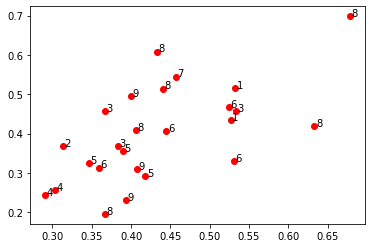

In [67]:
plt.scatter(df_dict[1]['lat'], df_dict[1]['long'], c='r')
for (m,n) in zip(list(df_dict[1]['lat']), list(df_dict[1]['long'])):
    plt.annotate( int(df_dict[1][df_dict[1].lat==m][df_dict[1].long==n]['order']), (m+0.002,n))

In [16]:
n= len(df_dict[0])
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
A

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8)]

In [17]:
import numpy as np

def haversine_func(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [18]:
start = (0.356,0.765)
c = {(0, j): haversine_func(start[0],start[1],float(df_dict[0][df_dict[0].ind==j]['lat']),float(df_dict[0][df_dict[0].ind==j]['long'])) for j in N}
for j in N:
    c[(j,0)]=c[(0,j)]
c

{(0, 1): 30.054846561537147,
 (0, 2): 21.183173334415553,
 (0, 3): 9.331944377462504,
 (0, 4): 5.433273606162528,
 (0, 5): 24.13704237879183,
 (0, 6): 8.072244912465083,
 (0, 7): 24.160865981382923,
 (0, 8): 11.603161712174568,
 (0, 9): 9.495540222375768,
 (1, 0): 30.054846561537147,
 (2, 0): 21.183173334415553,
 (3, 0): 9.331944377462504,
 (4, 0): 5.433273606162528,
 (5, 0): 24.13704237879183,
 (6, 0): 8.072244912465083,
 (7, 0): 24.160865981382923,
 (8, 0): 11.603161712174568,
 (9, 0): 9.495540222375768}

In [19]:
df2 = df_dict[0][['lat','long','ind']].copy()
df2

,lat,long,ind
9,0.489894,1.000000,1
47,0.188553,0.856131,2
53,0.309461,0.834905,3
66,0.309461,0.749999,4
67,0.182405,0.634433,5
73,0.334051,0.695754,6
83,0.168059,0.655659,7
104,0.327903,0.865565,8
113,0.434457,0.731131,9


In [20]:
df2['lat'] = np.radians(df['lat'])
df2['long'] = np.radians(df['long'])
df2

,lat,long,ind
9,0.008550,0.017453,1
47,0.003291,0.014942,2
53,0.005401,0.014572,3
66,0.005401,0.013090,4
67,0.003184,0.011073,5
73,0.005830,0.012143,6
83,0.002933,0.011443,7
104,0.005723,0.015107,8
113,0.007583,0.012761,9


In [21]:
dist = DistanceMetric.get_metric('haversine')
df2[['lat','long']].to_numpy()
dist.pairwise(df2[['lat','long']].to_numpy())*6373
df_dist = pd.DataFrame(dist.pairwise(df2[['lat','long']].to_numpy())*6373)

In [22]:
df_dist

,0,1,2,3,4,5,6,7,8
0,0.000000,37.142101,27.202773,34.293013,53.132924,38.021738,52.425000,23.414568,30.534375
1,37.142101,0.000000,13.654214,17.894682,24.668764,24.085798,22.414513,15.535398,30.682747
2,27.202773,13.654214,0.000000,9.443893,26.399507,15.717289,25.394185,3.979731,18.070149
3,34.293013,17.894682,9.443893,0.000000,19.103831,6.624598,18.907160,13.016838,14.060804
4,53.132924,24.668764,26.399507,19.103831,0.000000,18.194377,2.849638,30.378295,30.028024
5,38.021738,24.085798,15.717289,6.624598,18.194377,0.000000,18.994184,18.900119,11.841076
6,52.425000,22.414513,25.394185,18.907160,2.849638,18.994184,0.000000,29.346466,30.797514
7,23.414568,15.535398,3.979731,13.016838,30.378295,18.900119,29.346466,0.000000,19.080147
8,30.534375,30.682747,18.070149,14.060804,30.028024,11.841076,30.797514,19.080147,0.000000


In [23]:
for (i,j) in A:
    if i!= 0 and j!=0:
        c[(i,j)]=df_dist[i-1][j-1]
c

{(0, 1): 30.054846561537147,
 (0, 2): 21.183173334415553,
 (0, 3): 9.331944377462504,
 (0, 4): 5.433273606162528,
 (0, 5): 24.13704237879183,
 (0, 6): 8.072244912465083,
 (0, 7): 24.160865981382923,
 (0, 8): 11.603161712174568,
 (0, 9): 9.495540222375768,
 (1, 0): 30.054846561537147,
 (2, 0): 21.183173334415553,
 (3, 0): 9.331944377462504,
 (4, 0): 5.433273606162528,
 (5, 0): 24.13704237879183,
 (6, 0): 8.072244912465083,
 (7, 0): 24.160865981382923,
 (8, 0): 11.603161712174568,
 (9, 0): 9.495540222375768,
 (1, 2): 37.1421012999361,
 (1, 3): 27.20277315879446,
 (1, 4): 34.29301263508901,
 (1, 5): 53.132924298246444,
 (1, 6): 38.02173832548893,
 (1, 7): 52.424999611951264,
 (1, 8): 23.41456780598881,
 (1, 9): 30.53437518779187,
 (2, 1): 37.1421012999361,
 (2, 3): 13.654214328441071,
 (2, 4): 17.89468178443569,
 (2, 5): 24.668763745206387,
 (2, 6): 24.085797670327224,
 (2, 7): 22.414513430589082,
 (2, 8): 15.535398130447073,
 (2, 9): 30.68274713126571,
 (3, 1): 27.20277315879446,
 (3, 2)

In [24]:
from docplex.mp.model import Model

In [25]:
mdl = Model('CVRP')

In [26]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [27]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 20.1.0.0 | 2020-11-11 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              202001241
Found incumbent of value 286.944186 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 9 rows and 0 columns.
MIP Presolve modified 36 coefficients.
Aggregator did 36 substitutions.
Reduced MIP has 54 rows, 135 columns, and 270 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 72 indicators.
Presolve time = 0.00 sec. (0.28 ticks)
Probing time = 0.00 sec. (0.26 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 54 rows, 135 columns, and 270 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 72 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.25 ticks)
Clique table members: 54.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxa

In [28]:
print(solution)

solution for: CVRP
objective: 151.615
x_0_6=1
x_0_9=1
x_1_8=1
x_2_4=1
x_3_0=1
x_4_0=1
x_5_7=1
x_6_5=1
x_7_2=1
x_8_3=1
x_9_1=1
u_1=30.000
u_2=34.000
u_3=40.000
u_4=40.000
u_5=23.000
u_6=14.000
u_7=26.000
u_8=37.000
u_9=25.000



In [29]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [30]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]
active_arcs

[(0, 6),
 (0, 9),
 (1, 8),
 (2, 4),
 (3, 0),
 (4, 0),
 (5, 7),
 (6, 5),
 (7, 2),
 (8, 3),
 (9, 1)]

In [41]:
df_dict[0]

,ind,lat,long,order,cluster
9,1,0.489894,1.000000,5,0
47,2,0.188553,0.856131,8,0
53,3,0.309461,0.834905,4,0
66,4,0.309461,0.749999,1,0
67,5,0.182405,0.634433,2,0
73,6,0.334051,0.695754,7,0
83,7,0.168059,0.655659,2,0
104,8,0.327903,0.865565,1,0
113,9,0.434457,0.731131,8,0


<ipython-input-44-789dcf227bc5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-44-789dcf227bc5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-44-789dcf227bc5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-44-789dcf227bc5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
<ipython-input-44-789dcf227bc5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]

(0.15196753165122984,
 0.5059858734283658,
 0.6161547743942606,
 1.0182783440764638)

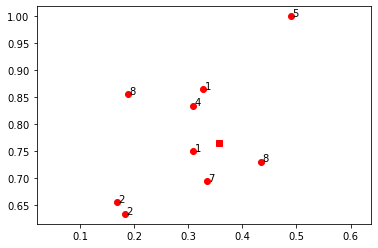

In [44]:
plt.scatter(df_dict[0]['lat'], df_dict[0]['long'], c='r')
for (m,n) in zip(list(df_dict[0]['lat']), list(df_dict[0]['long'])):
    plt.annotate( int(df_dict[0][df_dict[0].lat==m][df_dict[0].long==n]['order']), (m+0.002,n))
plt.plot(start[0], start[1], c='r', marker='s')
plt.axis('equal')

In [58]:
ans = []
ans.append(active_arcs)
ans

[[(0, 6),
  (0, 9),
  (1, 8),
  (2, 4),
  (3, 0),
  (4, 0),
  (5, 7),
  (6, 5),
  (7, 2),
  (8, 3),
  (9, 1)]]

In [46]:
n= len(df_dict[1])
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
start = (0.356,0.765)
c = {(0, j): haversine_func(start[0],start[1],float(df_dict[1][df_dict[1].ind==j]['lat']),float(df_dict[1][df_dict[1].ind==j]['long'])) for j in N}
for j in N:
    c[(j,0)]=c[(0,j)]
df2 = df_dict[1][['lat','long','ind']].copy()
df2['lat'] = np.radians(df['lat'])
df2['long'] = np.radians(df['long'])
dist = DistanceMetric.get_metric('haversine')
df2[['lat','long']].to_numpy()
dist.pairwise(df2[['lat','long']].to_numpy())*6373
df_dist = pd.DataFrame(dist.pairwise(df2[['lat','long']].to_numpy())*6373)
for (i,j) in A:
    if i!= 0 and j!=0:
        c[(i,j)]=df_dist[i-1][j-1]


In [59]:
ans

[[(0, 6),
  (0, 9),
  (1, 8),
  (2, 4),
  (3, 0),
  (4, 0),
  (5, 7),
  (6, 5),
  (7, 2),
  (8, 3),
  (9, 1)]]

In [66]:
from docplex.mp.model import Model
mdl = Model('CVRP')
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [ ]:
for i in range(5):
    n= len(df_dict[1])
    N = [i for i in range(1, n+1)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    start = (0.356,0.765)
    c = {(0, j): haversine_func(start[0],start[1],float(df_dict[1][df_dict[1].ind==j]['lat']),float(df_dict[1][df_dict[1].ind==j]['long'])) for j in N}
    for j in N:
        c[(j,0)]=c[(0,j)]
    df2 = df_dict[1][['lat','long','ind']].copy()
    df2['lat'] = np.radians(df['lat'])
    df2['long'] = np.radians(df['long'])
    dist = DistanceMetric.get_metric('haversine')
    df2[['lat','long']].to_numpy()
    dist.pairwise(df2[['lat','long']].to_numpy())*6373
    df_dist = pd.DataFrame(dist.pairwise(df2[['lat','long']].to_numpy())*6373)
    for (i,j) in A:
    if i!= 0 and j!=0:
        c[(i,j)]=df_dist[i-1][j-1]
    mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
    mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
    mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
    mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
    mdl.add_constraints(u[i] >= q[i] for i in N)
    mdl.parameters.timelimit = 15
    solution = mdl.solve(log_output=True)
    ans.append(active_arcs)

In [65]:
ans

[[(0, 6),
  (0, 9),
  (1, 8),
  (2, 4),
  (3, 0),
  (4, 0),
  (5, 7),
  (6, 5),
  (7, 2),
  (8, 3),
  (9, 1)],
 [(0, 4),
  (0, 9),
  (0, 17),
  (0, 24),
  (1, 18),
  (2, 7),
  (3, 5),
  (4, 10),
  (5, 8),
  (6, 14),
  (7, 23),
  (8, 6),
  (9, 12),
  (10, 21),
  (11, 25),
  (12, 22),
  (13, 16),
  (14, 0),
  (15, 13),
  (16, 20),
  (17, 15),
  (18, 0),
  (19, 11),
  (20, 0),
  (21, 0),
  (22, 3),
  (23, 19),
  (24, 2),
  (25, 1)],
 [(0, 4),
  (0, 9),
  (3, 5),
  (4, 10),
  (5, 8),
  (6, 14),
  (7, 23),
  (8, 6),
  (21, 0),
  (22, 3),
  (23, 19),
  (24, 2),
  (25, 1)],
 [(0, 4),
  (0, 9),
  (0, 17),
  (0, 24),
  (1, 18),
  (2, 7),
  (3, 5),
  (4, 10),
  (5, 8),
  (6, 14),
  (7, 23),
  (8, 6),
  (21, 0),
  (22, 3),
  (23, 19),
  (24, 2),
  (25, 1)]]